# Example: Rendering a trajectory map


<span style="color:blue">Copyright (c) 2014-2019 National Technology and Engineering
Solutions of Sandia, LLC. Under the terms of Contract DE-NA0003525
with National Technology and Engineering Solutions of Sandia, LLC,
the U.S. Government retains certain rights in this software.</span>    
    
<span style="color:blue">Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions
are met:</span>    
    
&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">1. Redistributions of source code must retain the above copyright
   notice, this list of conditions and the following disclaimer.</span>    
    
&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">2. Redistributions in binary form must reproduce the above copyright
   notice, this list of conditions and the following disclaimer in the
   documentation and/or other materials provided with the distribution.</span>    
    
<span style="color:blue">THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
"AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR
A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT
HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL,
SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT
LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE,
DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY
THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.</span>

**Purpose:** Sample code to render assembled trajectories     
In some cases, you may wish to read in trajectories with certain constraints. For example, we can have trajectories with a minimum number of points. Or we acknowledge that the points in the trajectory should be within a certain time and/or distance threshold to belong to the same trajectory. The Trajectory Builder does this.

**Imports**

In [ ]:
from tracktable.domain import terrestrial
from tracktable.render import mapmaker
from tracktable.core import data_directory
from tracktable.render import paths

import matplotlib
from matplotlib import pyplot

import os.path

**Requirements**: We will need data points built into trajectories. Replace the following with your own code to build the trajectories or use the provided example.

In [2]:
trajectory_filename = os.path.join(data_directory(), 'SampleTrajectories.traj')
infile = open(trajectory_filename, 'r')
trajectories = terrestrial.TrajectoryReader()
trajectories.input = infile

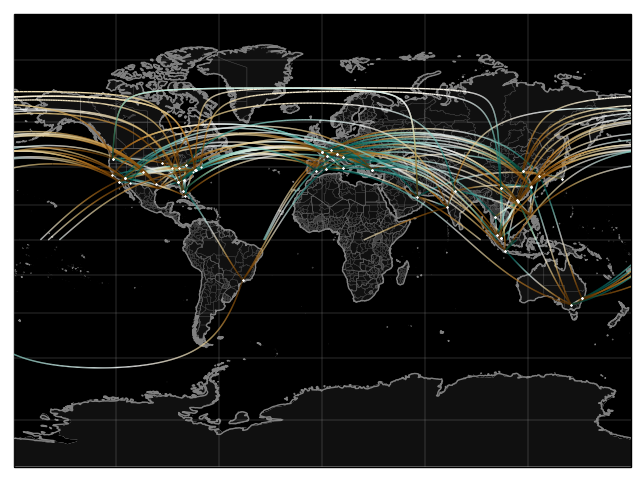

In [3]:
# JUPYTER NOTE: Jupyter will show you the state of the figure when you exit
# the cell in which you created it.  You cannot apply different effects in
# different cells as far as I know.  To work around this, just put all your
# different things in functions, then call those functions one after another
# in a single cell.

# Set up the canvas and map projection
# 8 x 6 inches at 100 dpi = 800x600 image
figure = pyplot.figure(dpi=100, figsize=(8, 6))
(mymap, map_actors) = mapmaker.mapmaker(domain='terrestrial',
                                        map_name='region:world')

color_scale = matplotlib.colors.Normalize(vmin=0, vmax=1)
paths.draw_traffic(traffic_map = mymap, trajectory_iterable = trajectories)

It is possible the scale of the selected map is not appropriate for the trajectories you wish to render. The rendered example map is of the continental United States (CONUS for short). This is one of the preset convenience maps and was set as the map name when we called the render function. Other convenience maps are europe, north_america, south_america, australia and world.  

Let us expand our view using another custom map.

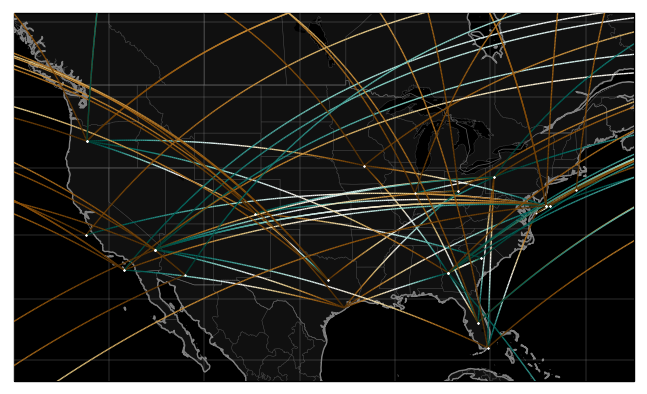

In [4]:
trajectory_filename = os.path.join(data_directory(), 'SampleTrajectories.traj')
infile = open(trajectory_filename, 'r')
trajectories = terrestrial.TrajectoryReader()
trajectories.input = infile

# Set up the canvas and map projection
figure = pyplot.figure(dpi=100, figsize=(8, 6))
(mymap, map_actors) = mapmaker.mapmaker(domain='terrestrial',
                                        map_name='region:conus')

color_scale = matplotlib.colors.Normalize(vmin=0, vmax=1)
paths.draw_traffic(traffic_map = mymap, trajectory_iterable = trajectories)

While we have the trajectories we want, they're kinda hard to see. We can customize our trajectories by adding color, changing the linewidth, etc.

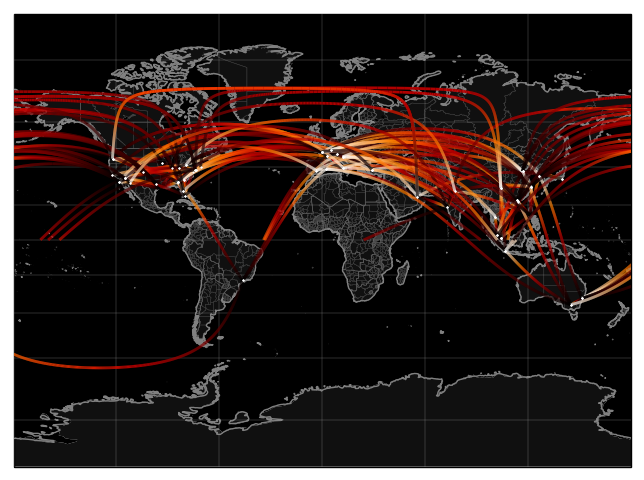

In [5]:
from tracktable.feature import annotations
import numpy

# Get trajectories and set up the map figure
trajectory_filename = os.path.join(data_directory(), 'SampleTrajectories.traj')
infile = open(trajectory_filename, 'r')
trajectories = terrestrial.TrajectoryReader()
trajectories.input = infile
figure = pyplot.figure(dpi=100, figsize=(8, 6))
(mymap, map_actors) = mapmaker.mapmaker(domain='terrestrial',
                                        map_name='region:world')

# Create a couple functions to annotate our trajectories with our options. 
# "Progress" produces the multi color trajectories to see the beginning, midpoints, and ends easier
# The linewidth generator is a function passed to the renderer that sets the width across the entire 
# trajectory. Other options include "taper" that changes the line width from start to end of the 
# trajectory.

annotator = annotations.retrieve_feature_function('progress')
def annotation_generator(traj_source):
    for trajectory in traj_source:
        yield(annotator(trajectory))
def constant_linewidth_generator(linewidth = 2):
    def linewidth_generator(trajectory):
        scalars = numpy.zeros(len(trajectory))
        scalars += float(linewidth)
        return scalars
    return linewidth_generator

# Decorates each trajectory with the preferences
trajectories_to_render = annotation_generator(trajectories)
scalar_generator = annotations.retrieve_feature_accessor("progress")
linewidth_generator = constant_linewidth_generator(2)
# Set the color we want. This produces a heat red color
colormap = "gist_heat"
# Dots are the location markers. Start and end points.
dot_size = 2
dot_color = "white"
paths.draw_traffic(traffic_map = mymap, 
                   trajectory_iterable = trajectories_to_render, 
                   color_map = colormap, 
                   trajectory_scalar_generator = scalar_generator,
                   trajectory_linewidth_generator = linewidth_generator,
                   dot_size=dot_size,
                   dot_color=dot_color,
                   color_scale = matplotlib.colors.Normalize(vmin=0, vmax=1),
                   axes=None
                  )